<a href="https://colab.research.google.com/github/tishakbhavsar/practising-pytorch/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification Using PyTorch


#### Classification : problem of predicting whether something is one thing or another (classes).

## 1. Make classification data

In [ ]:
import sklearn # sci-kit learn - ML
from sklearn.datasets import make_circles

In [ ]:
# Make a 1000 samples

n_samples = 1000

# Create circles

X,y = make_circles(n_samples, noise=0.03, random_state=42) # add some noise

len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5] # here we have 2 features (X) and 1 label (y-> 0,1), binary classification

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Make a dataframe of circle data using pandas

import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

In [ ]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


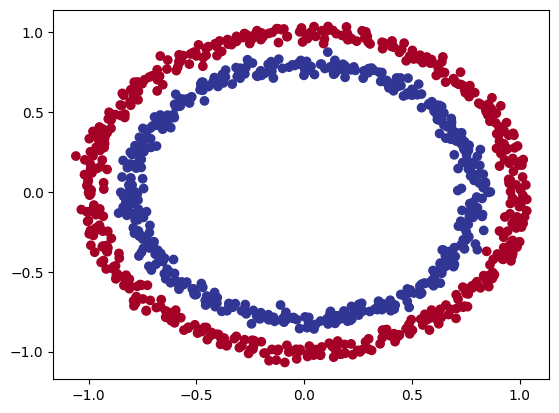

In [ ]:
# visualize, visualize, visualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap = plt.cm.RdYlBu)

 Note: The data we are working with is often referred to as a Toy Dataset. Something small enough to experiment but still sizeable enough to learn foundations.

### 1.1 Check input and output shapes.

In [ ]:
X.shape, y.shape # y is a scalar, where X has two features

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X_sample)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(800, 200)

### 2. Building a model

Let's build a model to classify our blue and red dots. To do so, we want to:

1) Set up device agnostic code so our ode will run on an accelerator (GPU) if there is one
2) Construct model (by subclassing `nn.Module`)
3) Define loss function and optimizer
4) Training and testing loop

In [ ]:
# Import PyTorch

import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now, let's create a model that:

1. Subclasses nn.Module (almost all models in PyTorch subclass it)
2. Create 2 nn.Linear() layers that are capable of handling shapes of the data
3. Define forward() method that overrides parent class.
4. Instantiate model

In [ ]:
# Model Creation

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )
  # 3. Forward method creation
  def forward(self, x): #torch.tensor) -> torch.tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output
    # return two_linear_layers(x)

# 4. instantiate model

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

### Using nn.Sequential !

What does sequential do? Easier way to create a neural network in a way. If we have a more complex NN, then making the class would be helping.

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
      untrained_preds = model_0(X_test.to(device))
print(untrained_preds.shape)
print("First ten preds:", torch.round(untrained_preds[:10]))
print("First ten labels:", y_test[:10])

torch.Size([200, 1])
First ten preds: tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
First ten labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Set up loss function and optimizer:

Which loss function to use?

For regression, use MSE or MAE(L1). For classification, we want binary cross entropy or categorical cross entropy.

For optimizer, two of the most common are SGD and Adam.

In [ ]:
# Setting up loss function
loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to BCE loss
loss_fn = nn.BCEWithLogitsLoss() # - this has sigmoid activation function (combines sigmoid layer with BCE loss)

# Equivalent to :
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCE(),
# )
# Setting up optimizer

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**. We can convert these logits into prediction probs by passing them into some kind of activation function. eg. binary cross entropy for binary classification and softmax for multiclass classification.

Then we can convert our model's prediction probs to **prediction labels** by either rounding them ( binary classification) or taking the argmax.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on model logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
# rounding

torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

For our pred probability values, we need to perform a range-style rounding on them:

if >=0.5 , class 1
if < 0.5, class 0

In [ ]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


### 3.2 Building Training Loop (finally!)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
# Set the number of epochs

epochs = 100

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # training
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into pred probs, into pred labels

  # calculate loss
  # loss = loss_fn (torch.round(y_logits), y_train) # only nn.BCELoss()
  loss = loss_fn(y_logits, y_train) # bce with logit loss is more numerically stable and does sigmoid thing

  accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero
  optimizer.zero_grad()

  # backward prop
  loss.backward()

  # optimizer step - gradient descent
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test Loss: 0.69460 | Test Acc: 57.50%
Epoch: 10 | Loss: 0.69768 | Acc: 52.00% | Test Loss: 0.69438 | Test Acc: 58.00%
Epoch: 20 | Loss: 0.69742 | Acc: 52.00% | Test Loss: 0.69418 | Test Acc: 57.50%
Epoch: 30 | Loss: 0.69717 | Acc: 52.00% | Test Loss: 0.69401 | Test Acc: 56.50%
Epoch: 40 | Loss: 0.69695 | Acc: 51.62% | Test Loss: 0.69385 | Test Acc: 56.50%
Epoch: 50 | Loss: 0.69675 | Acc: 51.38% | Test Loss: 0.69370 | Test Acc: 56.00%
Epoch: 60 | Loss: 0.69656 | Acc: 51.38% | Test Loss: 0.69357 | Test Acc: 56.00%
Epoch: 70 | Loss: 0.69638 | Acc: 51.38% | Test Loss: 0.69345 | Test Acc: 56.50%
Epoch: 80 | Loss: 0.69621 | Acc: 51.25% | Test Loss: 0.69334 | Test Acc: 56.50%
Epoch: 90 | Loss: 0.69606 | Acc: 51.38% | Test Loss: 0.69324 | Test Acc: 55.00%


## 4. Make predictions and evaluate the model

```
From the metrics, it looks like our model isn't learning anything!
```

To do so, we are going to import a function called plot_decision_boundary!



In [ ]:
import requests
from pathlib import Path

# Download helper functions from the repo

if Path("helper_functions.py").is_file():
  print("it exists!")
else:
  print("Download helper functions from Github!")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

it exists!


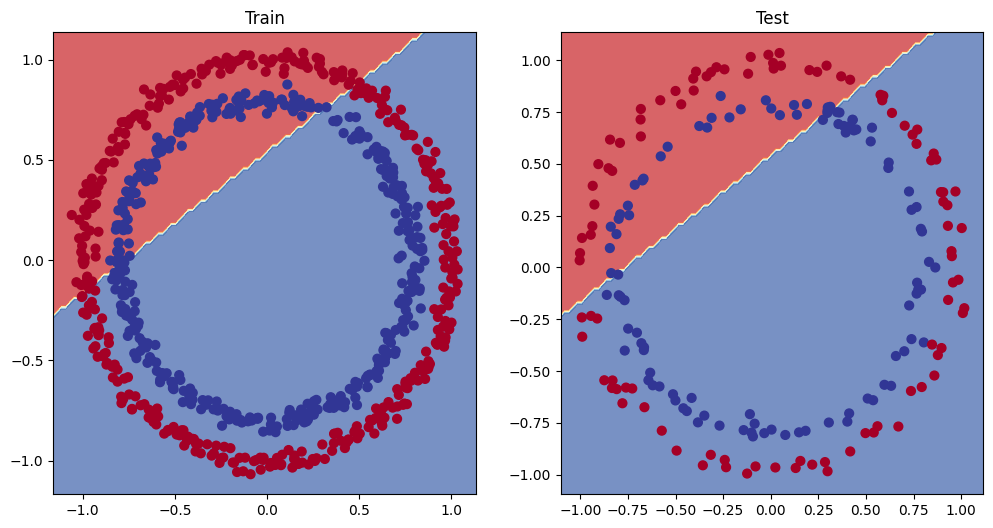

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### Because our model is made of 2 linear layers! This data is non-linear.

## 5. Improving our model:

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units – go from 5 hidden units to 10 hidden units.
* Changing the activation functions (Right now using Sigmoid functions) but can also put activation function within the model.
* Changing the learning rate - if learning rate is changing : exploding and vanishing gradients.
* Change the loss function.
* Fitting the training data longer (more epochs)


These options are all from a model's perspective, because they deal directly with model, not the data. And because these options are all values we (as machine learning and data scientists) can cgange, they are called **HYPERPARAMETERS**.

Let's try improving our model by:

- adding more hidden units (5->10)
- increase the number of layers 2->3
- increase epochs 100->100

### Increase Number of Hidden Units (10) and Adding one layer

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups wherever possible behind the scenes

model_1 = CircleModelV1()
model_1.to(device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create loss fn + Optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
epochs = 1000

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
       test_logits = model_1(X_test).squeeze()
       test_preds = torch.round(torch.sigmoid(test_logits))
       test_loss = loss_fn(test_logits, y_test)
       test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
  if epoch%100 == 0:
    print(f'Epoch : {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')


Epoch : 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch : 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch : 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test Acc: 46.00%
Epoch : 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test Acc: 45.00%
Epoch : 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test Acc: 46.00%
Epoch : 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test Acc: 46.00%
Epoch : 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch : 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch : 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch : 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%


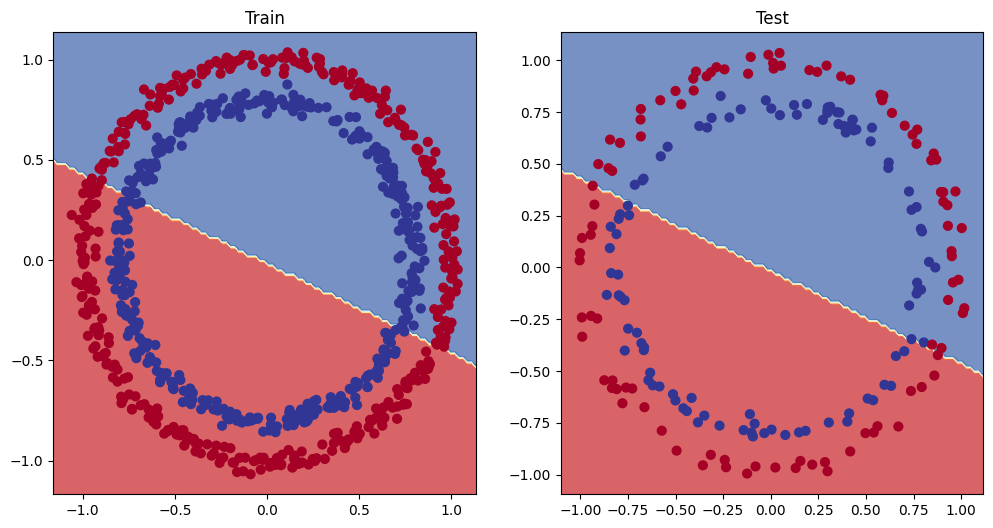

In [ ]:
# Plot decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Let's create linear data to check if our model is learning anything or not.

In [ ]:
# Create data same as a session 01

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Splitting data
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


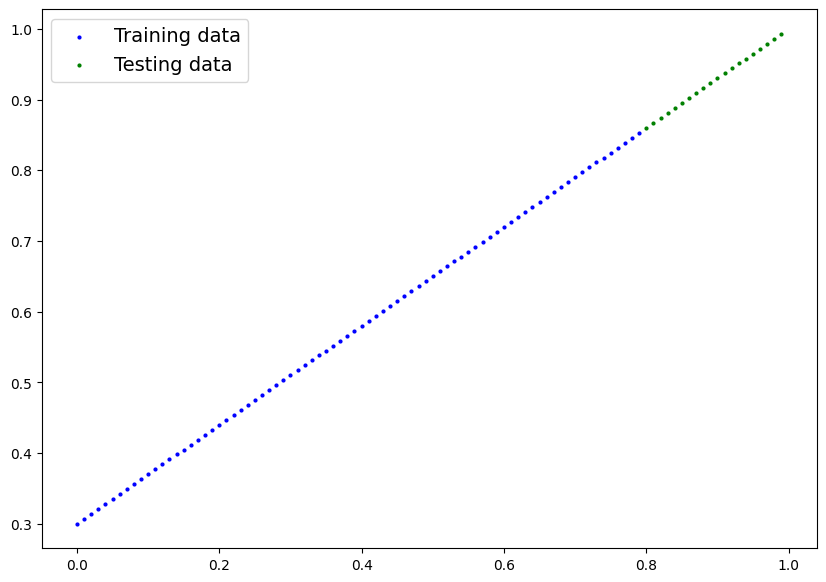

In [ ]:
plot_predictions(train_data = X_train_regression, train_labels=y_train_regression, test_data=X_test_regression,test_labels=y_test_regression)

In [ ]:
class LinearModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups wherever possible behind the scenes

model_linear = LinearModelV0()
model_linear.to(device)

LinearModelV0(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_linear.parameters(),lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
epochs = 1000

# Put data on target device

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_linear.train()
  y_pred = model_linear(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_linear.eval()
  with torch.inference_mode():
       test_preds = model_linear(X_test_regression)
       test_loss = loss_fn(test_preds, y_test_regression)
  if epoch%100 == 0:
    print(f'Epoch : {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}')


Epoch : 0 | Loss: 0.75986 | Test Loss: 0.94965
Epoch : 100 | Loss: 0.40272 | Test Loss: 0.54029
Epoch : 200 | Loss: 0.05876 | Test Loss: 0.13480
Epoch : 300 | Loss: 0.01461 | Test Loss: 0.03342
Epoch : 400 | Loss: 0.00308 | Test Loss: 0.00008
Epoch : 500 | Loss: 0.00309 | Test Loss: 0.00012
Epoch : 600 | Loss: 0.00309 | Test Loss: 0.00018
Epoch : 700 | Loss: 0.00299 | Test Loss: 0.00011
Epoch : 800 | Loss: 0.00299 | Test Loss: 0.00016
Epoch : 900 | Loss: 0.00289 | Test Loss: 0.00011


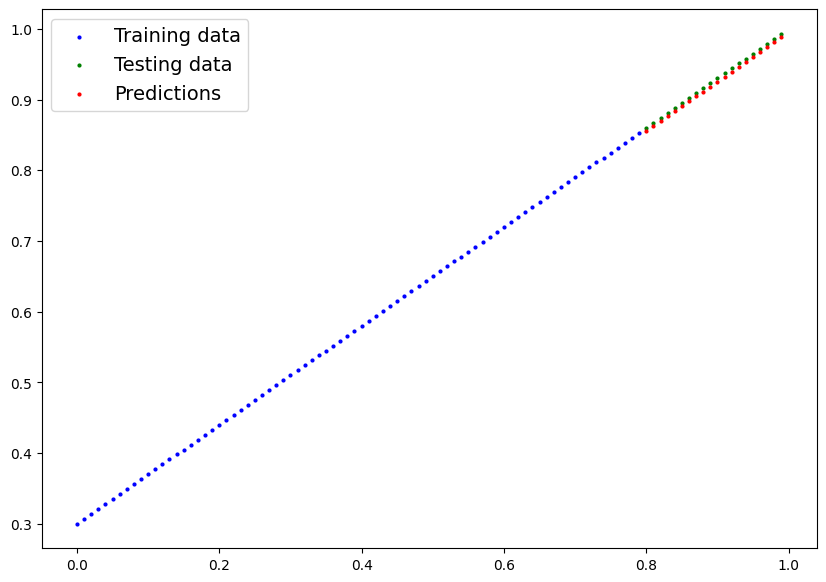

In [ ]:
# Turn on evaluation mode

model_linear.eval()

with torch.inference_mode():
  y_preds = model_linear(X_test_regression)
  plot_predictions(train_data = X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(), predictions=y_preds.cpu())

### 6. The missing piece : non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?

Or in machine learning terms, an infinite(but. really it is infinite) of linear and non-linear functions?"

### 6.1 Recreating non-linear data (red and blue circles)

In [ ]:
# Make a 1000 samples

n_samples = 1000

# Create circles

X,y = make_circles(n_samples, noise=0.03, random_state=42) # add some noise

len(X), len(y)

(1000, 1000)

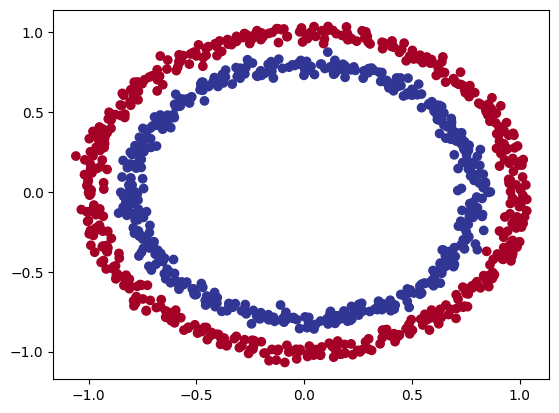

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(800, 200)

### 6.2 Building the Model

* Linear = straight lines
* Non-linear = non-straight lines

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self,x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_2 = CircleModelV2()
model_2.to(device)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
       test_logits = model_2(X_test).squeeze()
       test_preds = torch.round(torch.sigmoid(test_logits))
       test_loss = loss_fn(test_logits, y_test)
       test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
  if epoch%100 == 0:
    print(f'Epoch : {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')


Epoch : 0 | Loss: 0.56818 | Acc: 87.75% | Test Loss: 0.57378 | Test Acc: 86.50%
Epoch : 100 | Loss: 0.48153 | Acc: 93.50% | Test Loss: 0.49935 | Test Acc: 90.50%
Epoch : 200 | Loss: 0.37056 | Acc: 97.75% | Test Loss: 0.40595 | Test Acc: 92.00%
Epoch : 300 | Loss: 0.25458 | Acc: 99.00% | Test Loss: 0.30333 | Test Acc: 96.50%
Epoch : 400 | Loss: 0.17180 | Acc: 99.50% | Test Loss: 0.22108 | Test Acc: 97.50%
Epoch : 500 | Loss: 0.12188 | Acc: 99.62% | Test Loss: 0.16512 | Test Acc: 99.00%
Epoch : 600 | Loss: 0.09123 | Acc: 99.88% | Test Loss: 0.12741 | Test Acc: 99.50%
Epoch : 700 | Loss: 0.07100 | Acc: 99.88% | Test Loss: 0.10319 | Test Acc: 99.50%
Epoch : 800 | Loss: 0.05773 | Acc: 99.88% | Test Loss: 0.08672 | Test Acc: 99.50%
Epoch : 900 | Loss: 0.04853 | Acc: 99.88% | Test Loss: 0.07474 | Test Acc: 99.50%


### 6.4 Make predictions + evaluations

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()


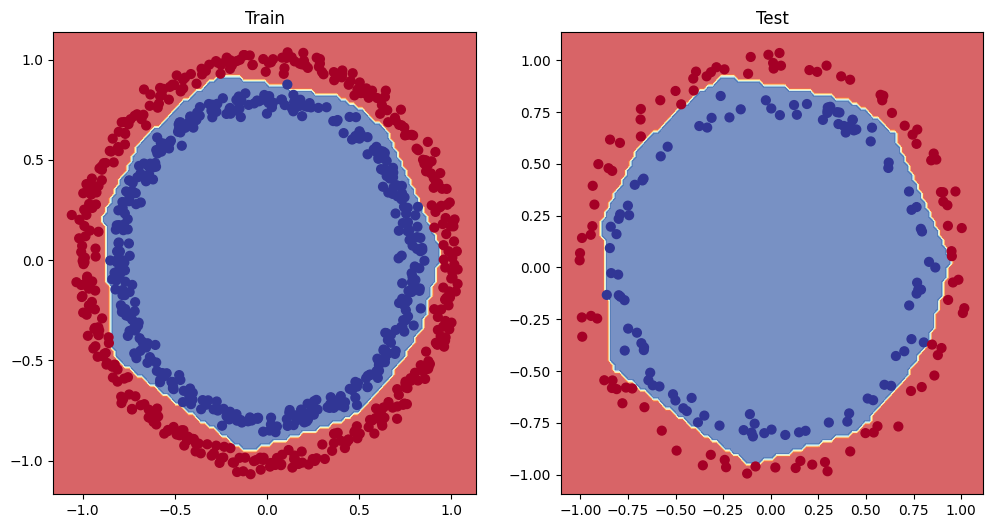

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

#### Can you improve THE decision boundary for V2 more?

Yes, I did this, by training for 2000 epochs.

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.



In [ ]:
# Create a tensor

A = torch.arange(-10,10,1,dtype=torch.float32) #pytorch default for integers was int64

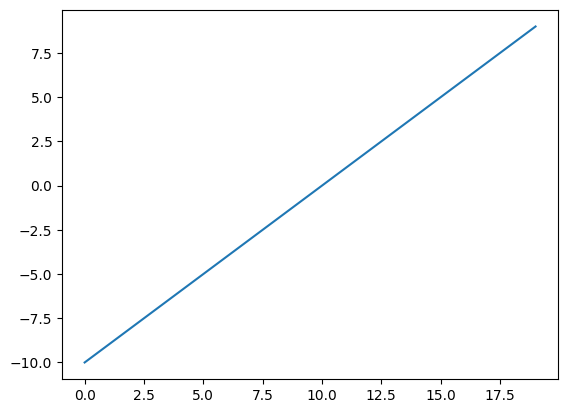

In [ ]:
plt.plot(A)

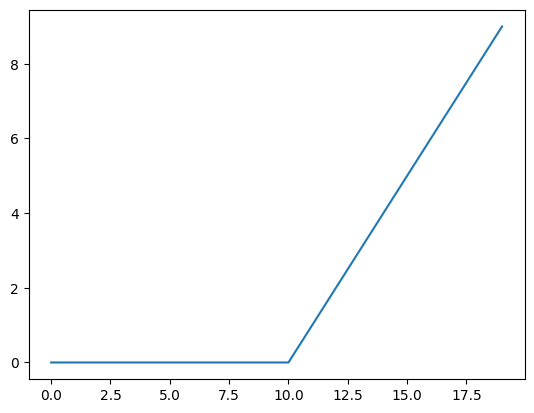

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x:torch.tensor) -> torch.Tensor:
   return torch.max(torch.tensor(0),x) # inputs must be tensor

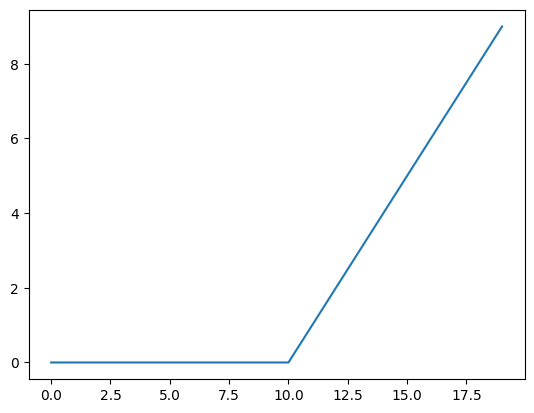

In [ ]:
plt.plot(relu(A));

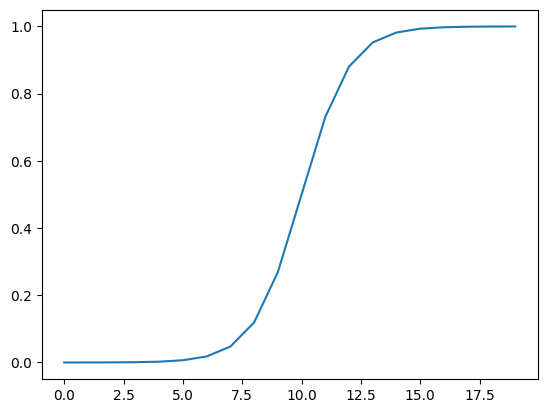

In [ ]:
plt.plot(torch.sigmoid(A));

In [ ]:
def custom_sigmoid(A:torch.tensor) -> torch.tensor:
  return (1/(1+torch.exp(-A)))

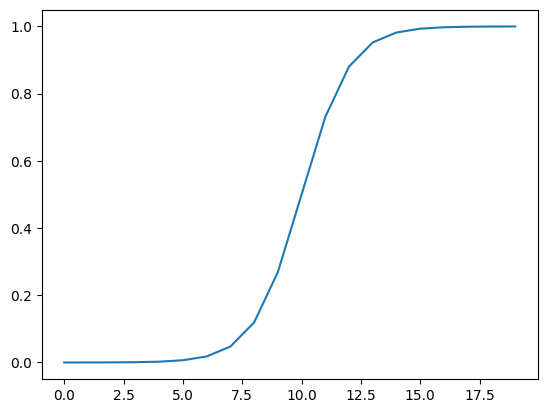

In [ ]:
plt.plot(custom_sigmoid(A))